## Import necessary library

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from google.colab import drive
from os import pipe

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Data loading

Load the "Bengaluru_House_Data.csv" file into a pandas DataFrame.


In [3]:
drive.mount('/content/drive') # Mount Google Drive

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House price prediction/Bengaluru_House_Data.csv')
    display(df.head(10))
except FileNotFoundError:
    print("Error: 'Bengaluru_House_Data.csv' not found in the specified path. Please ensure the file exists and the path is correct.")
    # Raise the FileNotFoundError to halt execution
    raise

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [7]:
df.isna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


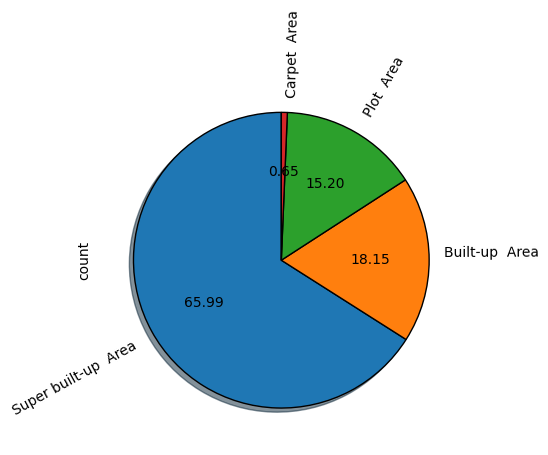

In [9]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

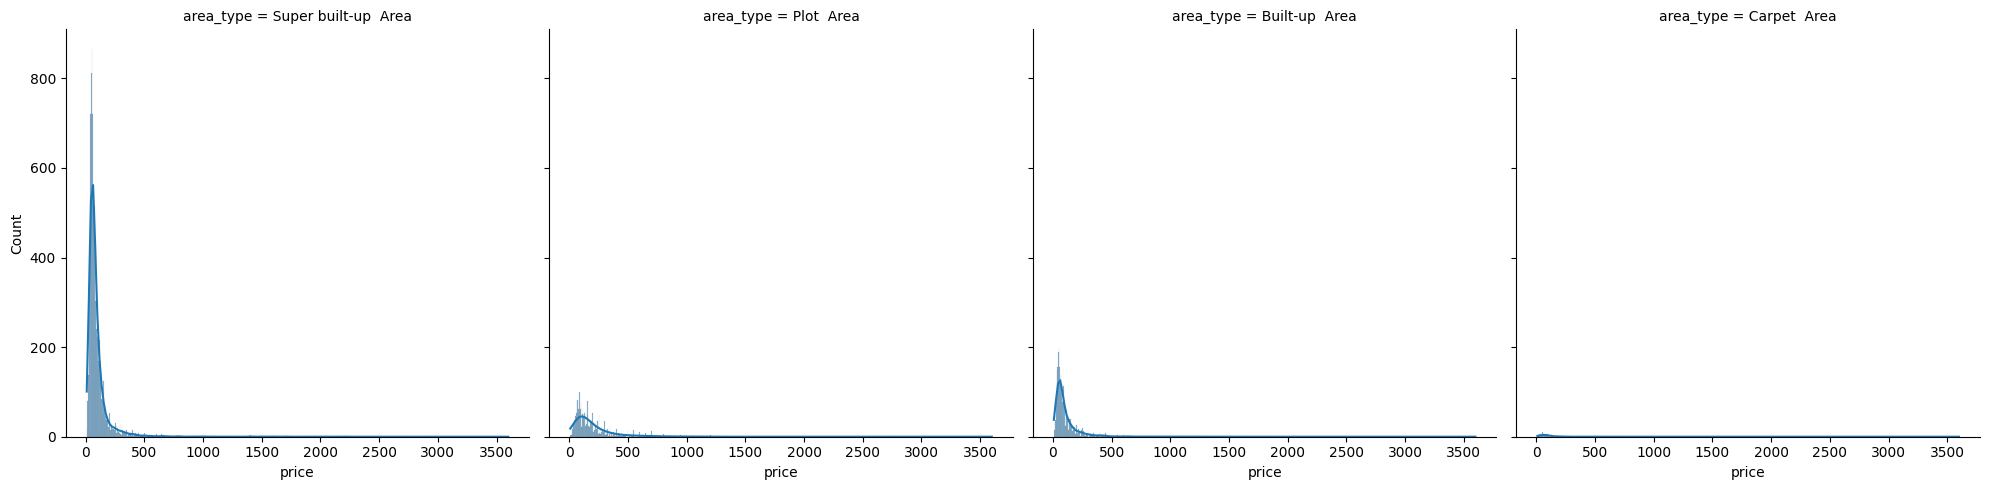

In [10]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [11]:
#we have dropped unused column like area_type & availability and null_value columes like society,balcony
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [12]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [13]:
df.info() #after dropping columns to balance our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


Now lets handle null values

In [14]:
df.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [15]:
df.location.value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [16]:
df['location'] = df['location'].fillna('Sarjapur Road')

In [17]:
df['bath'] = df['bath'].fillna(df['bath'].median())

<Axes: xlabel='bath', ylabel='count'>

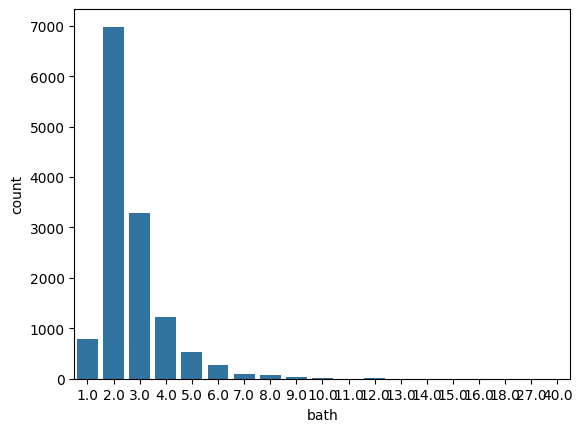

In [18]:
sns.countplot(x=df['bath'])

In [19]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [20]:
df['size'] = df['size'].fillna('2 BHK')

In [21]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [22]:
#Now we have an problem that in size column there are differnt types of notation(BHK,Bedroom)
#so to fix it we will split both then take first position value & typecast to int as it is in str type
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [23]:
df[df.bhk>20] #these are basically outliers as there is no such flats with this no of bedrooms

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [24]:
df['total_sqft'].unique() #as we have noticed there are some values with ranges like '1133 - 1384'. To fix this we fill find mean in below function

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def meanRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return

In [26]:
df['total_sqft'] = df['total_sqft'].apply(meanRange)

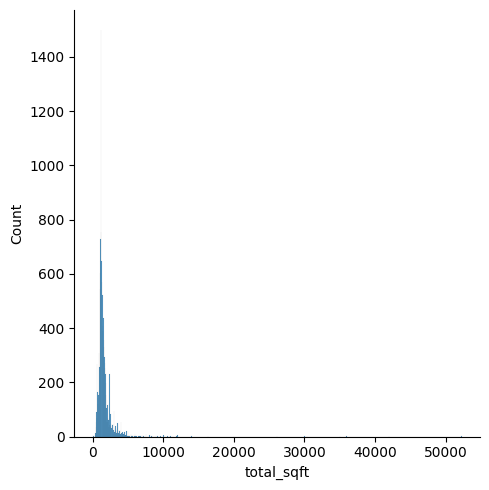

In [27]:
sns.displot(x=df['total_sqft'])

In [28]:
df.head(6)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [29]:
#now no need of column size so drop it
df.drop(columns=['size'],inplace=True)

Price per square feet

In [30]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [31]:
df['price_per_sqft']

,price_per_sqft
0,3699.810606
1,4615.384615
2,4305.555556
3,6245.890861
4,4250.000000
...,...
13315,6689.834926
13316,11111.111111
13317,5258.545136
13318,10407.336319


In [32]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [33]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1
singapura paradise,1


Now we can see that there are 1306 rows and while we apply one hot encoding there will be more than 1300 columns that will created so we will reduce the locations that are below 10 and mark them as others

In [34]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()
location_count

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


In [35]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

,count
location,
BTM 1st Stage,10
Nagadevanahalli,10
Basapura,10
Sector 1 HSR Layout,10
Dairy Circle,10
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


In [36]:
#now for all the above values we will set category as others
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
df['location'].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Nehru Nagar,11
Banjara Layout,11
LB Shastri Nagar,11


### Outlier detection and removal

In [37]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


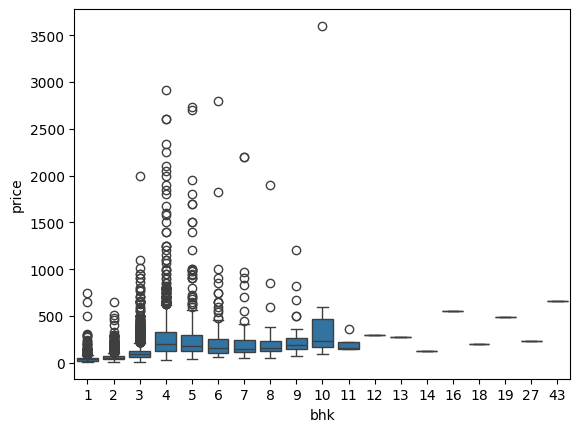

In [39]:
sns.boxplot(x=df['bhk'],y=df['price'])
plt.show()

In [40]:
(df['total_sqft']/df['bhk']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [41]:
df=df[((df['total_sqft']/df['bhk']) >= 300)] #A flat should have atleast 300 sqft then we can consider it a feasible flat, so we will remove below 300sqft
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [42]:
df.shape

(12530, 6)

In [43]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)

        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [44]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [45]:
df=bhk_outlier_remover(df)

In [46]:
df.shape

(7361, 6)

In [47]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2,5833.333333
10293,other,1800.0,1.0,200.0,1,11111.111111
10296,other,1353.0,2.0,110.0,2,8130.081301
10297,other,812.0,1.0,26.0,1,3201.970443


In [48]:
df.drop(columns=['price_per_sqft'],inplace=True)

Cleaned data

In [49]:
df.head(6)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4


In [50]:
df.to_csv("cleaned_data.csv")

In [51]:
X=df.drop(columns=['price'])
y=df['price']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
print(X_train.shape)
print(X_test.shape)

(5888, 4)
(1473, 4)


## Applying Linear Regression

In [54]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']), # Use sparse_output instead of sparse
                                       remainder='passthrough')

In [55]:
scaler = StandardScaler()

In [56]:
lr = LinearRegression()

In [57]:
pipe = make_pipeline(column_trans,scaler,lr)

In [58]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [59]:
y_pred_lr = pipe.predict(X_test)

In [60]:
r2_score(y_test,y_pred_lr)

0.8233783132019383

## Applying Lasso

In [61]:
lasso = Lasso()
pipe = make_pipeline(column_trans,scaler,lasso)

In [62]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [63]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8128285650772719

## Applying Ridge

In [64]:
ridge=Ridge()
pipe = make_pipeline(column_trans,scaler,ridge)

In [65]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [66]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8234146633312639

In [67]:
print("No Regularization: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.8233783132019383
Lasso:  0.8128285650772719
Ridge:  0.8234146633312639


In [68]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))

In [71]:
ridge = Ridge()
pipe = make_pipeline(column_trans, scaler, ridge)

param_grid = {
    'ridge__alpha': np.linspace(0.01, 100, 50),
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_
y_pred_ridge_tuned = best_ridge_model.predict(X_test)
r2_score_ridge_tuned = r2_score(y_test, y_pred_ridge_tuned)

print("Ridge (Tuned): ", r2_score_ridge_tuned)
print("Best Hyperparameters:", grid_search.best_params_)



Ridge (Tuned):  0.8264707836276568
Best Hyperparameters: {'ridge__alpha': 100.0, 'ridge__solver': 'saga'}


In [ ]:
pickle.dump(best_ridge_model, open('RidgeModelTuned.pkl', 'wb'))